<a href="https://colab.research.google.com/github/hamzafarooq/Time-Series/blob/master/EDA_Iowa_Liquor_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Set Overivew

The tutorial uses the Iowa Liquor Retails Sales. We will be using it dataset to predict future sales for one of the stores

This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012.
The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

Run this every time you restart your notebook

In [5]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install pyproj==1.9.6

In [6]:
#!pip install gmplot

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import datetime
import seaborn as sns

#Read Data 
There are three ways to read data:

1. Use GCP directly and biq query
2. Google Drive Mount
3. CSV Path

## GCP

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%%bigquery --project timeseriesmodeling-1 liquor_sales_orignial
SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
where  date > '2018-01-01'


## Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
liquor_sales_orignial=pd.read_csv('/content/drive/My Drive/Classroom/Time Series Modeling/liquor_sales.csv')

## Path to CSV

In [9]:
import pandas as pd

url = 'https://drive.google.com/file/d/1MRLQ4si-wDXGwUuZDUYUXXz9qNMIaT8z/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
liquor_sales_orignial = pd.read_csv(path)

# Data Overview

In [4]:
liquor_sales=liquor_sales_orignial # it is always useful to store an orignial version of the data

In [5]:
df_rows = liquor_sales.shape[0]

In [6]:
# Check for % of missing values in each column - drop nulls
liquor_sales.isnull().sum()/df_rows*100

Unnamed: 0                 0.000000
invoice_and_item_number    0.000000
date                       0.000000
store_number               0.000000
store_name                 0.000000
address                    0.105740
city                       0.105740
zip_code                   0.105740
store_location             9.228625
county_number              0.105772
county                     0.105740
category                   0.090164
category_name              0.090164
vendor_number              0.000048
vendor_name                0.000048
item_number                0.000000
item_description           0.000000
pack                       0.000000
bottle_volume_ml           0.000000
state_bottle_cost          0.000000
state_bottle_retail        0.000000
bottles_sold               0.000000
sale_dollars               0.000000
volume_sold_liters         0.000000
volume_sold_gallons        0.000000
dtype: float64

In [7]:
liquor_sales = liquor_sales.dropna()
liquor_sales=liquor_sales.drop('Unnamed: 0',axis=1)

In [8]:
## check for data types and outliers for continuous variables
liquor_sales.dtypes

invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                        object
zip_code                   float64
store_location              object
county_number              float64
county                      object
category                   float64
category_name               object
vendor_number              float64
vendor_name                 object
item_number                  int64
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

In [9]:
liquor_sales['Date'] = pd.to_datetime(liquor_sales['date'])
liquor_sales.drop('date',axis=1)

,invoice_and_item_number,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date
1,INV-18452700008,3880,Target Store T-2454 / Council Bluffs,3804 Metro Dr,Council Bluffs,51503.0,POINT (-95.837595 41.220979),78.0,POTTAWATTA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2019-03-29
2,INV-26104700022,3645,Wal-Mart 1764 / Windsor Heights,1001 73rd St,Windsor Heights,50311.0,POINT (-93.716991 41.594787),77.0,Polk,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-25
3,INV-26094900045,3769,Wal-Mart 0753 / Cedar Fall,525 Brandilynn Blvd,Cedar Falls,50613.0,POINT (-92.440394 42.485042),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-24
4,INV-24534700017,3942,Twin Town Liquor,104 Highway 30 West,Toledo,52342.0,POINT (-92.579446 41.985985),86.0,TAMA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-01-14
5,INV-28537300002,3494,Sam's Club 6514 / Waterloo,210 East Tower Park Dr,Waterloo,50702.0,POINT (-92.353103 42.456374),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26906,Jack Daniels Single Barrel,6,750,27.59,41.39,12,496.68,9.0,2.37,2020-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234173,INV-27524400041,4397,Quik Trip #514 / Ankeny,802 E 1st St,Ankeny,50021.0,POINT (-93.586368 41.731862),77.0,POLK,1052100.0,Imported Brandies,420.0,MOET HENNESSY USA,48099,Hennessy VS,24,200,6.49,9.74,7,68.18,1.4,0.36,2020-05-27
6234174,INV-10410100011,4661,Quik Trip #531 / Grimes,"1900, SE 37th St",Grimes,50111.0,POINT (-93.773467 41.658525),77.0,POLK,1052100.0,Imported Brandies,420.0,MOET HENNESSY USA,48099,Hennessy VS,24,200,6.24,9.36,8,74.88,1.6,0.42,2018-02-15
6234176,INV-26778600020,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1052100.0,Imported Brandies,389.0,REMY COINTREAU USA INC,49189,Remy Martin VSOP,24,200,6.72,10.08,6,60.48,1.2,0.31,2020-04-24
6234177,INV-14562700014,5162,Urbandale Liquor,"6401, Douglas Ave",Urbandale,50322.0,POINT (-93.705732 41.629411),77.0,POLK,1052100.0,Imported Brandies,420.0,MOET HENNESSY USA,48101,Hennessy Vs Cognac Minis,10,600,28.14,42.21,1,42.21,0.6,0.15,2018-09-20


In [10]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt


In [15]:
liquor_sales.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06
mean,3.938517e+03,5.127668e+04,5.691731e+01,1.050173e+06,2.655981e+02,4.827630e+04,1.238875e+01,8.825328e+02,1.037188e+01,1.556002e+01,1.114755e+01,1.452694e+02,9.342999e+00,2.463932e+00
std,1.133247e+03,9.853370e+02,2.741127e+01,8.537505e+04,1.378256e+02,6.562580e+04,8.079144e+00,5.223360e+02,9.139225e+00,1.370974e+01,3.097307e+01,4.920404e+02,3.738493e+01,9.876214e+00
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011100e+06,1.000000e+01,1.590000e+02,1.000000e+00,2.000000e+01,4.300000e-01,6.500000e-01,0.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00
25%,2.633000e+03,5.031700e+04,3.100000e+01,1.012200e+06,1.150000e+02,2.698600e+04,6.000000e+00,7.500000e+02,5.540000e+00,8.310000e+00,3.000000e+00,3.374000e+01,1.500000e+00,4.000000e-01
50%,4.004000e+03,5.110300e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.817800e+04,1.200000e+01,7.500000e+02,8.260000e+00,1.239000e+01,6.000000e+00,7.500000e+01,4.800000e+00,1.260000e+00
75%,4.984000e+03,5.231700e+04,7.700000e+01,1.062400e+06,3.890000e+02,6.486400e+04,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,1.050000e+01,2.770000e+00
max,9.938000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.994490e+05,6.000000e+01,6.000000e+03,1.871200e+03,2.806800e+03,1.195200e+04,2.795573e+05,1.181250e+04,3.120530e+03


In [14]:
daily_sale=liquor_sales.groupby('Date')[['sale_dollars']].sum().sort_values(by = ['sale_dollars'], \
                                                                                ascending=False).reset_index()

daily_sale=daily_sale.sort_values('Date')
daily_sale.head(5)

,Date,sale_dollars
590,2018-01-02,860593.78
514,2018-01-03,1060001.27
532,2018-01-04,1031787.40
642,2018-01-05,498108.41
148,2018-01-08,1456710.50


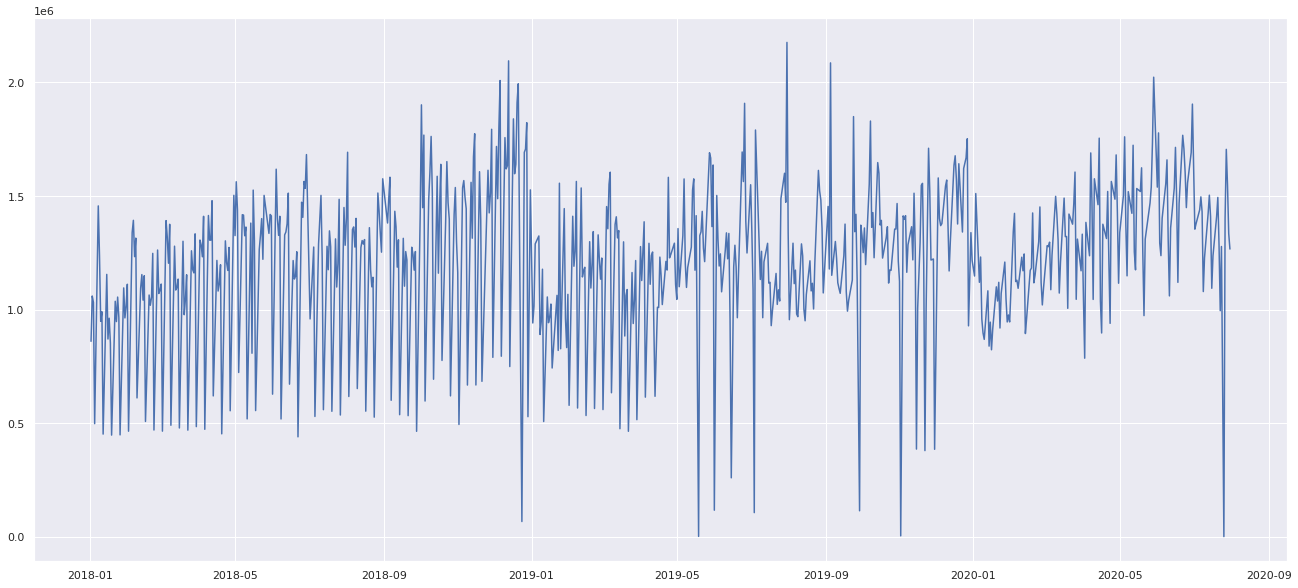

In [16]:
plt.figure(figsize=(20,10))
plt.plot(daily_sale['Date'],daily_sale['sale_dollars'])
plt.show()

In [17]:
liquor_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date
1,INV-18452700008,2019-03-29,3880,Target Store T-2454 / Council Bluffs,3804 Metro Dr,Council Bluffs,51503.0,POINT (-95.837595 41.220979),78.0,POTTAWATTA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2019-03-29
2,INV-26104700022,2020-03-25,3645,Wal-Mart 1764 / Windsor Heights,1001 73rd St,Windsor Heights,50311.0,POINT (-93.716991 41.594787),77.0,Polk,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-25
3,INV-26094900045,2020-03-24,3769,Wal-Mart 0753 / Cedar Fall,525 Brandilynn Blvd,Cedar Falls,50613.0,POINT (-92.440394 42.485042),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-24
4,INV-24534700017,2020-01-14,3942,Twin Town Liquor,104 Highway 30 West,Toledo,52342.0,POINT (-92.579446 41.985985),86.0,TAMA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-01-14
5,INV-28537300002,2020-07-07,3494,Sam's Club 6514 / Waterloo,210 East Tower Park Dr,Waterloo,50702.0,POINT (-92.353103 42.456374),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26906,Jack Daniels Single Barrel,6,750,27.59,41.39,12,496.68,9.0,2.37,2020-07-07


In [18]:
liquor_sales.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'Date'],
      dtype='object')

# Finding sales for all Wal-Mart Stores

In [19]:
wmt_list=[]
for i in set(liquor_sales['store_name']):
  if 'Wal-Mart' in i:
    wmt_list.append(i)

len(wmt_list)

54

In [20]:
wmt_stores_only = liquor_sales[liquor_sales['store_name'].isin(wmt_list)]
wmt_stores_only.head(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date
2,INV-26104700022,2020-03-25,3645,Wal-Mart 1764 / Windsor Heights,1001 73rd St,Windsor Heights,50311.0,POINT (-93.716991 41.594787),77.0,Polk,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-25
3,INV-26094900045,2020-03-24,3769,Wal-Mart 0753 / Cedar Fall,525 Brandilynn Blvd,Cedar Falls,50613.0,POINT (-92.440394 42.485042),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-24
390,INV-15629100006,2018-11-12,3886,Wal-Mart 0646 / Anamosa,101 115 St,Anamosa,52205.0,POINT (-91.26496500000002 42.101677),53.0,JONES,1012100.0,Canadian Whiskies,260.0,DIAGEO AMERICAS,11298,Crown Royal,6,1750,31.99,47.99,30,1439.70,52.5,13.86,2018-11-12
465,INV-16195500041,2018-12-10,3663,Wal-Mart 1496 / Waterloo,1334 Flammang Dr,Waterloo,50702.0,POINT (-92.330801 42.460238),7.0,BLACK HAWK,1022200.0,100% Agave Tequila,330.0,Gemini Spirits,88036,Margaritaville Silver Tequila,12,750,6.19,9.29,12,135.24,9.0,2.37,2018-12-10
470,INV-23573600042,2019-11-29,3562,Wal-Mart 0797 / W Burlington,324 West Agency Rd,West Burlington,52655.0,POINT (-91.158407 40.813125),29.0,DES MOINES,1022200.0,100% Agave Tequila,330.0,Gemini Spirits,88036,Margaritaville Silver Tequila,12,750,7.51,11.27,12,111.48,9.0,2.37,2019-11-29


In [21]:
locations=set(wmt_stores_only['store_location'])

In [22]:
def long(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace('(',"")
    k=i.split()
    l.append(float(k[0]))
  return l
    



In [23]:
def lat(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace(')',"")
    k=i.split()
    l.append(float(k[1]))
  return l

In [25]:
wmt_stores_only['lat']= lat(wmt_stores_only['store_location'].values)
wmt_stores_only['long']= long(wmt_stores_only['store_location'].values)


In [26]:
wmt_locations=wmt_stores_only[['store_number','lat','long']].drop_duplicates()

In [28]:
wmt_store_sales = wmt_stores_only.groupby('store_number')[['sale_dollars']].sum().sort_values(by = ['sale_dollars'], \
                                                                                ascending=False).reset_index()


In [29]:
wmt_store_sales=pd.merge(wmt_store_sales,wmt_locations , how='left', on='store_number')

In [30]:
wmt_store_sales.head(5)

,store_number,sale_dollars,lat,long
0,3644,1711328.58,41.644195,-93.505276
1,4209,1573935.35,41.688332,-93.771698
2,3757,1556303.65,42.530454,-96.372870
3,3899,1515982.71,41.558107,-93.795512
4,3562,1504839.47,40.813125,-91.158407


# Showing Geo-Location 
The code for this section was taken from :https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb#scrollTo=7R8Bx_Zmb0cM

In [31]:
# Extract the data we're interested in
lat = wmt_store_sales['lat'].values
lon = wmt_store_sales['long'].values
sales = wmt_store_sales['sale_dollars'].values
#area = cities['area_total_km2'].values

In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


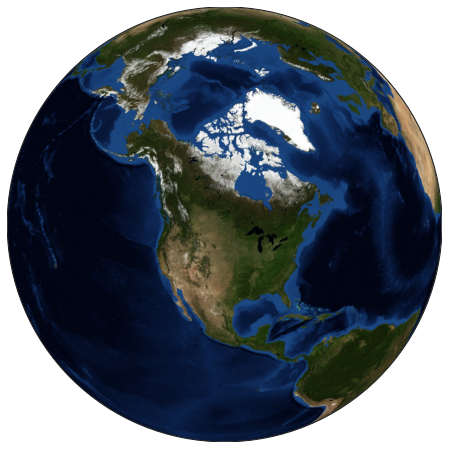

In [105]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

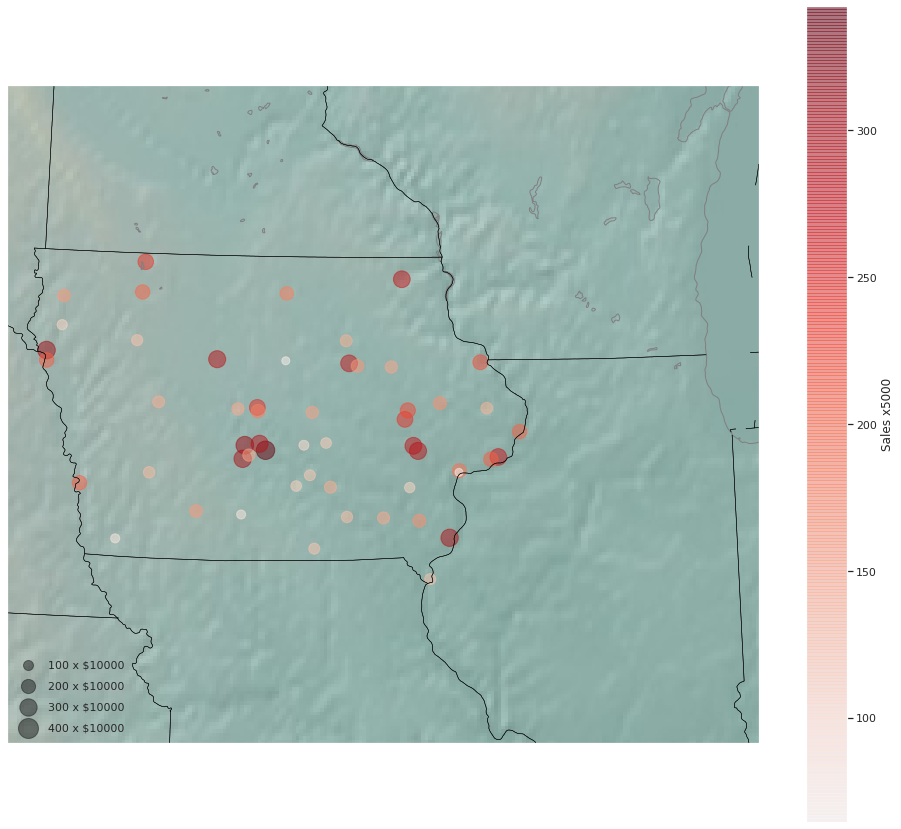

In [107]:
# 1. Draw the map background
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='lcc', resolution='f', #40.6331° N, 89.3985° W
            lat_0=42, lon_0=-92,
            width=8E5, height=7E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=sales/5000,s=sales/5000,cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Sales x5000')
plt.clim(min(sales/5000), max(sales/5000))

# make legend with dummy points
for a in [100,200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' x $10000')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

# Exploratory Data Analysis
### Top 5 categories of liquor by total sales

Credit: Batool Fatima
https://www.linkedin.com/in/batoolfatima1/

In [79]:
liquor_sales=wmt_stores_only

In [80]:
liquor_sales['category_name'] = liquor_sales['category_name'].str.lower().str.title()

In [81]:
categories = pd.DataFrame(liquor_sales[['category_name','sale_dollars']])
Top_categories = categories.groupby('category_name')[['sale_dollars']].sum().sort_values(by = ['sale_dollars'], \
                                                                                ascending=False).reset_index()

In [82]:
Top_categories.shape

(42, 2)

In [83]:
Top_categories.head()

,category_name,sale_dollars
0,American Vodkas,8.252301e+06
1,Canadian Whiskies,6.278502e+06
2,Spiced Rum,3.905040e+06
3,Straight Bourbon Whiskies,3.150158e+06
4,Tennessee Whiskies,2.521258e+06


In [84]:
categories_sales = Top_categories.head(10)
categories_sales

,category_name,sale_dollars
0,American Vodkas,8.252301e+06
1,Canadian Whiskies,6.278502e+06
2,Spiced Rum,3.905040e+06
3,Straight Bourbon Whiskies,3.150158e+06
4,Tennessee Whiskies,2.521258e+06
5,Imported Vodkas,2.409062e+06
6,Whiskey Liqueur,2.213349e+06
7,American Flavored Vodka,2.186324e+06
8,Temporary & Specialty Packages,2.090497e+06
9,Cream Liqueurs,1.743822e+06


# Exploratory Data Analysis - Part 2


### Top Selling 10 categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

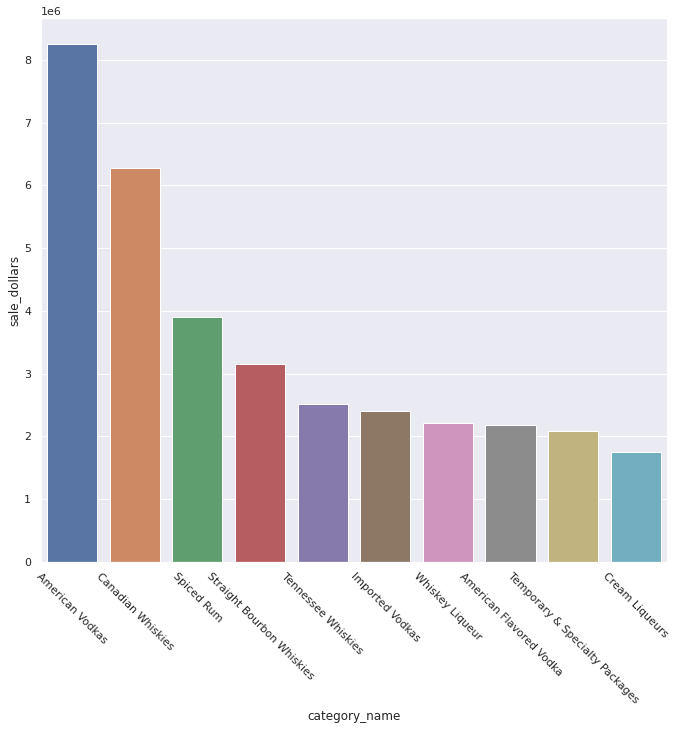

In [86]:
# bar chart for total sales for each category
plt.figure(figsize=(10,10))
sns.barplot(x= 'category_name', y = 'sale_dollars', data=categories_sales)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Daily Sales

In [87]:
liquor_sales['year'] = pd.DatetimeIndex(liquor_sales['Date']).year
liquor_sales['month'] = pd.DatetimeIndex(liquor_sales['Date']).month
liquor_sales['day'] = pd.DatetimeIndex(liquor_sales['Date']).day_name()

In [88]:
daily_sales = liquor_sales.groupby('day')[['sale_dollars']].sum().sort_values(by = ['day']).reset_index()
#daily_sales

In [89]:
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

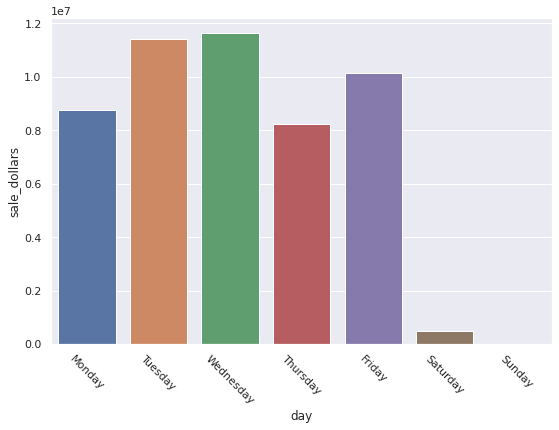

In [90]:
# bar chart for total sales for each category
plt.figure(figsize=(8,6))
sns.barplot(x= 'day', y = 'sale_dollars', data=daily_sales, order = daysofweek)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Yearly trend of liquor categories

In [92]:
yearly_data = pd.DataFrame(liquor_sales[liquor_sales['category_name'].isin(['Canadian Whiskies', 'American Vodkas', \
                                                                            'Spiced Rum','Straight Bourbon Whiskies', \
                                                                            'Tennessee Whiskies'])])

x = yearly_data.groupby(['year', 'category_name'])['sale_dollars'].sum().reset_index()


(array([2017.75, 2018.  , 2018.25, 2018.5 , 2018.75, 2019.  , 2019.25,
        2019.5 , 2019.75, 2020.  , 2020.25]),
 <a list of 11 Text major ticklabel objects>)

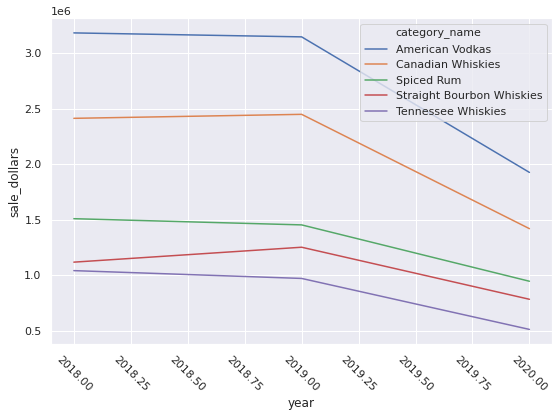

In [93]:
plt.figure(figsize=(8,6))
sns.lineplot(x= 'year', y = 'sale_dollars', data=x, hue='category_name')
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Drill deeper into the top selling categories - Canadian Whiskey

In [94]:
Can_whiskies_items = liquor_sales[liquor_sales['category_name'] == 'Canadian Whiskies']

In [95]:
Can_whiskies_items['item_description'] = Can_whiskies_items['item_description'].str.lower().str.title()

In [96]:
Can_whiskies_items.groupby(['item_description'])[['bottles_sold', 'sale_dollars']]\
.sum().sort_values(by = ['bottles_sold', 'sale_dollars'], ascending = False).reset_index().head(5)

,item_description,bottles_sold,sale_dollars
0,Black Velvet,184891,2392926.72
1,Crown Royal,37223,1033812.13
2,Crown Royal Regal Apple,36191,926277.25
3,Black Velvet Toasted Caramel,20724,209934.12
4,Canadian Ltd Whisky,18115,238596.12


In [97]:
Top_Whisky_items = pd.DataFrame(Can_whiskies_items[Can_whiskies_items['item_description'].isin\
                                      (['Black Velvet', 'Crown Royal', 'Black Velvet Toasted Caramel',\
                                      'Canadian Ltd Whisky','Crown Royal Regal Apple'])])

Top_Whisky_items1 = Top_Whisky_items.groupby(['item_description', 'year'])[['bottles_sold', 'sale_dollars']]\
.sum().sort_values(by = ['item_description', 'year', 'bottles_sold']).reset_index()
#Top_Whisky_items

In [98]:
len(Top_Whisky_items)

19327

## bottles_sold for Top 5 Canadian Whisky Items

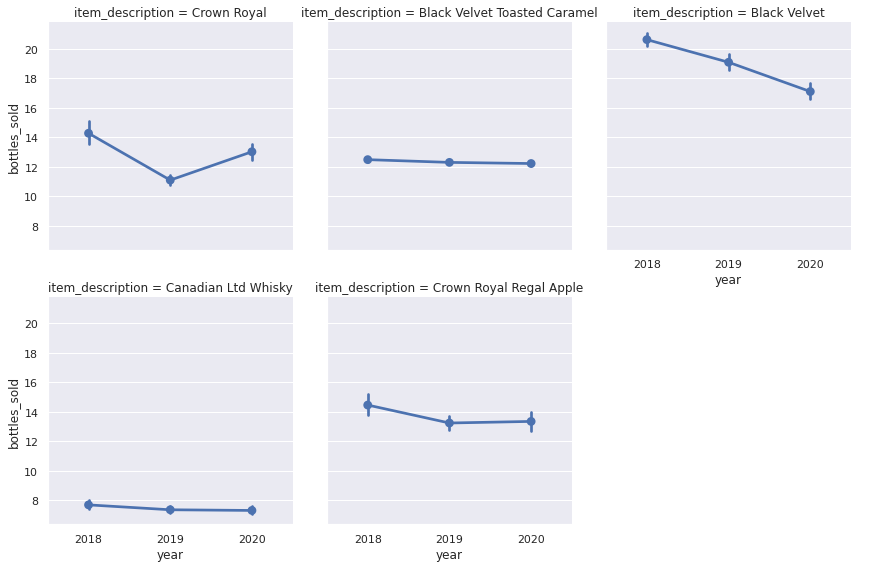

In [99]:
g = sns.FacetGrid(Top_Whisky_items, col="item_description", col_wrap = 3, height=4)
g.map(sns.pointplot, "year", "bottles_sold", alpha=.1)
g.add_legend();

## Sales for Top 5 Canadian Whisky Items

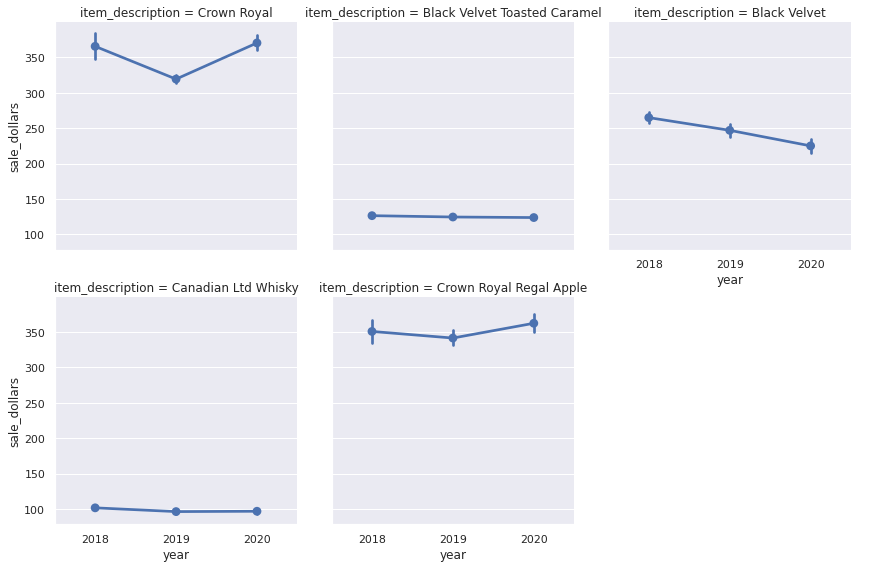

In [100]:
b = sns.FacetGrid(Top_Whisky_items, col="item_description", col_wrap = 3, height=4)
b.map(sns.pointplot, "year", "sale_dollars", alpha=.1)
b.add_legend();

## Average Markup for Canadian Whisky Items


In [101]:
Top_Whisky_items['Average_Markup'] = ((Top_Whisky_items['state_bottle_retail'] - Top_Whisky_items['state_bottle_cost'])/Top_Whisky_items['bottles_sold'])/(Top_Whisky_items['state_bottle_cost']/Top_Whisky_items['bottles_sold'])

In [102]:
Top_Whisky_items.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date,lat,long,year,month,day,Average_Markup
390,INV-15629100006,2018-11-12,3886,Wal-Mart 0646 / Anamosa,101 115 St,Anamosa,52205.0,POINT (-91.26496500000002 42.101677),53.0,JONES,1012100.0,Canadian Whiskies,260.0,DIAGEO AMERICAS,11298,Crown Royal,6,1750,31.99,47.99,30,1439.70,52.5,13.86,2018-11-12,42.101677,-91.264965,2018,11,Monday,0.500156
3022,INV-14503400024,2018-09-18,3625,Wal-Mart 0892 / Ankeny,1002 SE National Dr,Ankeny,50021.0,POINT (-93.582348 41.70486400000001),77.0,POLK,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,10550,Black Velvet Toasted Caramel,12,750,6.75,10.13,12,121.56,9.0,2.37,2018-09-18,41.704864,-93.582348,2018,9,Tuesday,0.500741
3030,INV-24708000008,2020-01-21,3859,Wal-Mart 0750 / Independence,302 Enterprise Dr SW,Independence,50644.0,POINT (-91.892924 42.450709),10.0,BUCHANAN,1012100.0,Canadian Whiskies,259.0,Heaven Hill Brands,10550,Black Velvet Toasted Caramel,12,750,6.75,10.13,12,121.56,9.0,2.37,2020-01-21,42.450709,-91.892924,2020,1,Tuesday,0.500741
3035,INV-24082800016,2019-12-20,3660,Wal-Mart 2935 / Knoxville,814 W Bell Ave,Knoxville,50138.0,POINT (-93.106728 41.306176),63.0,MARION,1012100.0,Canadian Whiskies,259.0,Heaven Hill Brands,10550,Black Velvet Toasted Caramel,12,750,6.75,10.13,12,121.56,9.0,2.37,2019-12-20,41.306176,-93.106728,2019,12,Friday,0.500741
3041,INV-22916500024,2019-10-30,3626,Wal-Mart 2714 / Spencer,500 11th St,Spencer,51301.0,POINT (-95.152474 43.126816),21.0,CLAY,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,10550,Black Velvet Toasted Caramel,12,750,6.75,10.13,12,121.56,9.0,2.37,2019-10-30,43.126816,-95.152474,2019,10,Wednesday,0.500741


In [103]:
Top_Whisky_Markup = Top_Whisky_items.groupby(['item_description'])[['Average_Markup']]\
.sum().sort_values(by = ['Average_Markup'], ascending = False).reset_index()

Top_Whisky_Markup

,item_description,Average_Markup
0,Black Velvet,4801.193099
1,Crown Royal,1496.223375
2,Crown Royal Regal Apple,1323.645863
3,Canadian Ltd Whisky,1211.575567
4,Black Velvet Toasted Caramel,840.242963
